# Hands-On Assignment 1

In this assignment, you will pre-process and analyze synthetic data (i.e., data produced by an algorithm rather than collected from the real world).

The objective of this assignment is for you to learn about:
 - Data manipulation (selecting, adding, and removing rows and columns).
 - Data exploration (understanding the structure and contents of a dataset).
 - Data selection (filtering rows and columns).
 - Iteration over various data types.
 - Feature engineering (pre-processing data for use with machine learning).
 - Basic data visualization (e.g., plotting data to explore functional relationships between variables).
 - Working with mathematical equations and turning them into code.

Throughout this course, we will be using the [Pandas library](https://pandas.pydata.org/) to manipulate data.
This library is very large and can be quite complex,
but we will cover the basics of Pandas in this lesson.
If you want additional information or practice,
we recommend the official [Pandas Tutorial](https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html).

The data we will use in this lesson is located in this repository in a file called `synthetic_covid_data.csv`.

## Synthetic Covid-19 Data

*The data/scenario used for the following exercise is entirely fictional and intended for instructional purposes only.*

Sainte Croix University has developed a new, cheap, rapid antigen test for SARS-CoV-2 with potentially high sensitivity
(it can detect even trace amounts of a certain protein of the SARS-CoV-2 virion).
However, the protein that the test detects is also a human **isoantigen**:
it is already present in some subset of humans.
We will call those individuals who have the isoantigen without Covid infection "isoantigenic".

The antigen test yields a **titer** value:
the number of times a serum extracted from a person can be diluted before the antigen is no longer detectable by the test.
The higher the value of the titer, the more prevalent the antigen must be in the serum.
Note that titer values are recorded as integers.

Synthetic data, representing an unbiased sample of the population in Sainte Croix County
who *do not* have current symptoms and were not previously infected with Covid-19 at the time of testing,
has been included in this repository as `synthetic_covid_data.csv`.
This data includes titer values and, if the patient became symptomatic within 14 days of the test, the number of days after the test that symptoms appeared.

The following cell imports Pandas and loads the data into a Pandas DataFrame.

In [234]:
import random
import math
import numpy
import pandas

# Load the file "synthetic_covid_data.csv" into a pandas DataFrame.
# index_col refers to the column name in the csv (comma separated values)
# file that we will treat as an index (identifier for each example/row).
covid_data = pandas.read_csv('synthetic_covid_data.csv', index_col = 'id')

# Print out the DataFrame.
# Note that it only prints a summary if there are too many rows.
covid_data

,infected,symptomatic,days_before_symptoms,titer
id,,,,
0,False,False,NaN,0
1,False,False,NaN,0
2,False,False,NaN,26
3,False,False,NaN,0
4,False,False,NaN,0
...,...,...,...,...
4995,False,False,NaN,0
4996,False,False,NaN,1
4997,False,False,NaN,0


## Part 0: Dataframe Manipulation

Throughout this course, you will be heavily using [Pandas DataFrames](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)
(a dataframe is also frequently just called a "frame").
Running the cell above will print out a summary of the frame we created,
note that we can also look at it as a [table](https://en.wikipedia.org/wiki/Table_(information)),
with rows of values organized into columns, where each column shares a specific data type and interpretation.

This section provides a small overview of some of the common operations you will be using with Pandas DataFrames.

### Column Selection

To select a single column from a frame, you can just index it like you would a normal Python dict/map.
For example, to select only the `infected` column we would do the following:

In [235]:
covid_data['infected']

id
0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Name: infected, Length: 5000, dtype: bool

When a single column selected from a DataFrame,
Pandas will return the result as a [Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) instead of a DataFrame.

You can also select multiple columns at the same time by using a list of column names instead of just a single column name:

In [236]:
covid_data[['infected', 'symptomatic']]

,infected,symptomatic
id,,
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
4995,False,False
4996,False,False
4997,False,False


When multiple columns are selected, a DataFrame will be returned.

<h4 style="color: darkorange; font-size: x-large";>★ Task 0.A</h4>

Your task now is to complete the function below.
This function takes two arguments: a frame and a column name;
and returns the column from the frame with the given name.

In [237]:
def select_column(frame, column_name):
    
    return frame[column_name]


print("Selected column 'symptomatic':")
select_column(covid_data, 'symptomatic')


Selected column 'symptomatic':


id
0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Name: symptomatic, Length: 5000, dtype: bool

### Row Selection

To select rows from a DataFrame, we will generally use the "indexing" syntax.
You first select a column, and then you make an expression using that column.
Rows where the expression is true are returned.
Most simple Python expression can be used.

(Note that the [DataFrame.loc()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html) method allows for much more complex selection, but it is outside the scope of this assignment.)

For example, the following cell will select all the rows where individuals have a `titer` value of 32.
Note that we referenced `covid_data` twice: once to select the column (`covid_data['titer']`) and again to reference the frame that we want to select data from (the outer use of `covid_data`).

In [238]:
covid_data[covid_data['titer'] == 32]

,infected,symptomatic,days_before_symptoms,titer
id,,,,
704,False,False,NaN,32
725,False,False,NaN,32
800,True,True,1.0,32
990,True,True,1.0,32
1096,True,True,0.0,32
2415,True,True,3.0,32
2428,True,False,NaN,32
2435,False,False,NaN,32
2893,False,False,NaN,32


We can also use more expressions than just equals (`==`):

In [239]:
# You can use inequalities.
print("titer > 32")
print(covid_data[covid_data['titer'] > 32])

print('---')

# You can use more complex expression with different columns.
# `&` is used for "and", and `|` is used for "or".
print("asymptomatic and (titer > 40)")
print(covid_data[~(covid_data['symptomatic']) & (covid_data['titer'] > 40)])

print('---')

# You can also use `~` to negate a condition (note the parens).
print("not (titer > 32)")
print(covid_data[~(covid_data['titer'] > 32)])

titer > 32
      infected  symptomatic  days_before_symptoms  titer
id                                                      
34        True         True                   0.0     35
75        True         True                   1.0     35
146      False        False                   NaN     33
148      False        False                   NaN     36
262       True         True                   2.0     41
...        ...          ...                   ...    ...
4743      True        False                   NaN     33
4770      True         True                   0.0     33
4778      True         True                   1.0     36
4815     False        False                   NaN     33
4818     False        False                   NaN     36

[71 rows x 4 columns]
---
asymptomatic and (titer > 40)
      infected  symptomatic  days_before_symptoms  titer
id                                                      
540       True        False                   NaN     43
852       True      

As you create more complex expressions to select data,
you may find some cases or operators that Pandas does not support (which normal Python does support).
This is because Pandas overrides the normal Python operators (`==`, `<`, `~`, etc) when a Pandas object (frame/series) is on the left hand side of the operator.
You should always test your selection expression and may have to play around with it a bit.

<h4 style="color: darkorange; font-size: x-large";>★ Task 0.B</h4>

Your task is to complete the function below.
This function takes three arguments: a frame, a column name, and a value;
and returns the rows of the frame where the value in the supplied column matches the given value.

In [240]:
def filter_rows(frame, column_name, value):
    return frame[frame[column_name] == value]

print("Filtered rows where 'titer' == 5:")
filter_rows(covid_data, 'titer', 5)

Filtered rows where 'titer' == 5:


,infected,symptomatic,days_before_symptoms,titer
id,,,,
309,True,False,NaN,5
1070,True,True,7.0,5
3267,True,False,NaN,5
3534,True,False,NaN,5


### Creating a new DataFrame

Empty frames can be created simply using the default constructor: `new_frame = pandas.DataFrame()`.

However to create a populated frame, the easiest way is to construct the frame using a dictionary that already has your data in it.
The keys should be the column names, and the values should be lists of values you want in each of the frame's columns.

For the remaining exercises in this section, we will be creating a new frame (`test_frame`) with some test data.

In [241]:
# Define a dictionary containing the data we want to add.
test_data = {
    'Name': ['Andrew', 'Eriq', 'Reilly', 'Michael'],
    'Surfing Score': [5.3, 5.9, 5.1, 5.2],
    'Qualification': ['MS', 'PhD', 'PhD', 'PhD'],
}

# Create the DataFrame from the test data.
test_frame = pandas.DataFrame(test_data)

# Observe the result.
test_frame

,Name,Surfing Score,Qualification
0,Andrew,5.3,MS
1,Eriq,5.9,PhD
2,Reilly,5.1,PhD
3,Michael,5.2,PhD


### Adding Columns

To add a column to an existing frame, you can just select the column (even if it does not exist) and assign a list values into to.
For example:
```python
some_frame['column_name'] = [1, 2, 3]
```
This also works for replacing an entire existing column.

Suppose we wanted to add a new column ("State") to our new test frame.
We can use the following code to add the new column.

In [242]:
# Declare a list of the values we want to put in the column (in order).
states = ['California', 'California', 'Arizona', 'Oregon']

# Assign the values into the frame using the new column name ('State').
test_frame['State'] = states

# Observe the result.
test_frame

,Name,Surfing Score,Qualification,State
0,Andrew,5.3,MS,California
1,Eriq,5.9,PhD,California
2,Reilly,5.1,PhD,Arizona
3,Michael,5.2,PhD,Oregon


<h4 style="color: darkorange; font-size: x-large";>★ Task 0.C</h4>

Your task is to now complete the function below.
This function takes three arguments: a frame, a column name, and a list of values;
and returns the modified frame with the new column.

In [243]:
def add_column(frame, column_name, new_list):
    frame[column_name] = new_list
    return frame

print("Added a column 'Patient ID' that is filled with ints:")
if ('Patient ID' not in covid_data.columns):
    add_column(covid_data, 'Patient ID', list(range(len(covid_data))))
covid_data

Added a column 'Patient ID' that is filled with ints:


,infected,symptomatic,days_before_symptoms,titer,Patient ID
id,,,,,
0,False,False,NaN,0,0
1,False,False,NaN,0,1
2,False,False,NaN,26,2
3,False,False,NaN,0,3
4,False,False,NaN,0,4
...,...,...,...,...,...
4995,False,False,NaN,0,4995
4996,False,False,NaN,1,4996
4997,False,False,NaN,0,4997


### Removing Columns

You can remove a column from a frame using the [DataFrame.pop()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pop.html) method.
Just specify the column that you want to remove, and the column will be removed from the frame and returned to you.

For example, if we wanted to remove the "Surfing Score" column from our test frame, we could do the following:

In [244]:
# Drop the surfing score column.
old_column = test_frame.pop("Surfing Score")

# Observe the result.
test_frame

,Name,Qualification,State
0,Andrew,MS,California
1,Eriq,PhD,California
2,Reilly,PhD,Arizona
3,Michael,PhD,Oregon


<h4 style="color: darkorange; font-size: x-large";>★ Task 0.D</h4>

Your task is to now complete the function below.
This function takes two arguments: a frame and a column name;
and returns the modified frame which no longer has the specified column.

In [245]:
def drop_column(frame, column_name):
    frame.pop(column_name)
    return frame

print("Removed the 'Patient ID' column added in the previous cell (if it exists):")
if ('Patient ID' in covid_data.columns):
    drop_column(covid_data, 'Patient ID')
covid_data

Removed the 'Patient ID' column added in the previous cell (if it exists):


,infected,symptomatic,days_before_symptoms,titer
id,,,,
0,False,False,NaN,0
1,False,False,NaN,0
2,False,False,NaN,26
3,False,False,NaN,0
4,False,False,NaN,0
...,...,...,...,...
4995,False,False,NaN,0
4996,False,False,NaN,1
4997,False,False,NaN,0


### Concatenating Frames

Putting together two data frames is a pretty complex task, and there are a lot of things to consider, like:
 - What if there are some columns in one frame and not the other?
 - What if there are duplicate rows?
 - What if there are missing values?
 
As this class progresses, you will become more equipped to handle these different situations.
But for now, we will discuss the most simple case: adding all the rows from two or more frames into a single frame.
To do this, we can use the [pandas.concat()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) function.
Just specify a list of the frames you want to combine as arguments.

For example, the below cell creates a new frame with more test data and add it to our test frame.

In [246]:
# Additional data that we want to add.
additional_data = {
    'Name': ['Alice', 'Zack'],
    'Qualification': ['BS', 'BS'],
    'State': ["Georgia", "Hawaii"],
}
additional_frame = pandas.DataFrame(additional_data)

# Combine the two frames together.
# Note that our original frame is unchanged.
# The `ignore_index` parameter is used to keep the internal row numbers consistent
# (try without this parameter and see how the result changes).
new_frame = pandas.concat([test_frame, additional_frame], ignore_index = True)

# Observe the result.
new_frame

,Name,Qualification,State
0,Andrew,MS,California
1,Eriq,PhD,California
2,Reilly,PhD,Arizona
3,Michael,PhD,Oregon
4,Alice,BS,Georgia
5,Zack,BS,Hawaii


<h4 style="color: darkorange; font-size: x-large";>★ Task 0.E</h4>

Your task is to now complete the function below.
This function takes two arguments: a frame and another frame;
and returns a new frame that combines the two passed in frames.

In [247]:
def concat_frames(frame1, frame2):
    new_frame = pandas.concat([frame1, frame2], ignore_index = True)

    return new_frame

print("Combined one frame with only uninfected individuals and one with only infected individuals:")
new_frame = concat_frames(covid_data[~covid_data['infected']], covid_data[covid_data['infected']])
new_frame

Combined one frame with only uninfected individuals and one with only infected individuals:


,infected,symptomatic,days_before_symptoms,titer
0,False,False,NaN,0
1,False,False,NaN,0
2,False,False,NaN,26
3,False,False,NaN,0
4,False,False,NaN,0
...,...,...,...,...
4995,True,False,NaN,11
4996,True,False,NaN,31
4997,True,False,NaN,1
4998,True,False,NaN,9


### Iterating Over Rows

You can do a lot in Pandas just by using their built-in functions.
But sometimes, you just need to get the raw data and work with it yourself.
In these cases, it can be useful to iterate over each row in a frame.

Like with many things in Pandas, there are many different ways to iterate over rows.
We recommend either using [DataFrame.index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.index.html) to get the index for each row,
or [DataFrame.iterrows](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iterrows.html) to get each row.

In [248]:
# Get each index and use that to index into each row.
# Note that the column, not row is indexed first.
for index in covid_data.index:
    if ((not covid_data['symptomatic'][index]) and (covid_data['titer'][index] > 44)):
        print("Special Row Index: ", index)

print('---')

# Get each index and each row.
for (index, row) in covid_data.iterrows():
    if ((not row['symptomatic']) and (row['titer'] > 44)):
        print("Special Row Index: ", index)
        print("Full Row:")
        print(row)
        print('###')

Special Row Index:  852
Special Row Index:  1420
---
Special Row Index:  852
Full Row:
infected                 True
symptomatic             False
days_before_symptoms      NaN
titer                      45
Name: 852, dtype: object
###
Special Row Index:  1420
Full Row:
infected                 True
symptomatic             False
days_before_symptoms      NaN
titer                      45
Name: 1420, dtype: object
###


### Useful Functions

The DataFrame class has **MANY** [methods associated with it](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html).
Throughout this course, make sure to consult the documentation before implementing new functionality.

Below are a few methods that you may find useful in this and future assignments:
 - Number of Rows -- You can use the built-in function `len()` on a frame the same way that you can use it on a list or dict.
     You can also use [DataFrame.count()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.count.html).
 - Column Names -- You can get the available column names using [DataFrame.columns](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html).
 - Basic Frame Info -- [DataFrame.info()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) can be used to output basic information about the structure of the frame.
 - Numeric Aggregates -- The DataFrame class has
     [sum()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html),
     [min()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.min.html),
     [max()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.max.html),
     [median()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.median.html),
     and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html) methods.
     [DataFrame.describe()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)
     can be used to get most of these stats on all **numeric** columns in a frame.
 - Plotting Functions -- The DataFrame class has premade methods for plotting (using [matplotlib](https://matplotlib.org/)).
     For example, [DataFrame.hist()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html) can be used to make a histogram
     and [DataFrame.plot.scatter()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html) can be used to make a scatter plot.
     These methods are not as full-features as using matplotlib directly, but they can give you a fast and simple way to visualize a frame.
     For more information, see [this reference](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html).

Below are some examples of these functions in use.

In [249]:
# Get the number of rows in the frame.
print("Number of rows: ", len(covid_data))

# Get the number of rows we selected.
print("Number of selected rows: ", len(covid_data[covid_data['titer'] == 32]))

Number of rows:  5000
Number of selected rows:  17


In [250]:
# Get the column names.
print(covid_data.columns)

# Iterate over the column names as strings.
print([column_name for column_name in covid_data.columns])

Index(['infected', 'symptomatic', 'days_before_symptoms', 'titer'], dtype='object')
['infected', 'symptomatic', 'days_before_symptoms', 'titer']


In [251]:
# Get basic information about the frame.
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   infected              5000 non-null   bool   
 1   symptomatic           5000 non-null   bool   
 2   days_before_symptoms  138 non-null    float64
 3   titer                 5000 non-null   int64  
dtypes: bool(2), float64(1), int64(1)
memory usage: 256.0 KB


In [252]:
# Aggregate over a single column.
print("Average days before symptoms: ", covid_data['days_before_symptoms'].mean())

# When called on a full frame, the aggregate is applied to each column.
# Note that non-numeric columns are converted to numeric values for aggregation
# (e.g. False -> 0.0 and True -> 1.0).
frame_aggregate = covid_data.mean()
print("Type of result when aggregating a full DataFrame: ", type(frame_aggregate))
frame_aggregate

Average days before symptoms:  5.405797101449275
Type of result when aggregating a full DataFrame:  <class 'pandas.core.series.Series'>


infected                0.051000
symptomatic             0.027600
days_before_symptoms    5.405797
titer                   3.214800
dtype: float64

In [253]:
# Get aggregate information about numeric columns.
covid_data.describe()

,days_before_symptoms,titer
count,138.000000,5000.00000
mean,5.405797,3.21480
std,3.877010,8.30552
min,0.000000,0.00000
25%,2.000000,0.00000
50%,5.000000,0.00000
75%,9.000000,1.00000
max,13.000000,45.00000


array([[<Axes: title={'center': 'days_before_symptoms'}>,
        <Axes: title={'center': 'titer'}>]], dtype=object)

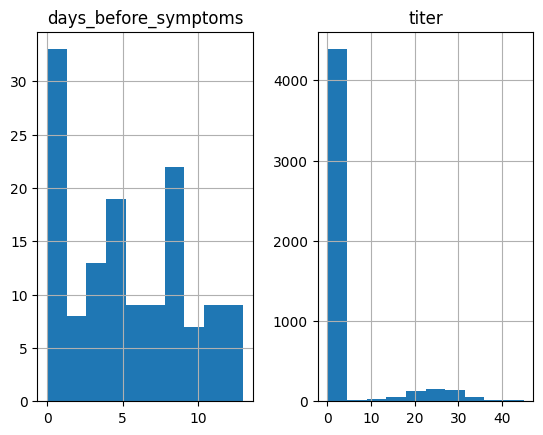

In [254]:
# Display a histogram of values for different columns in a frame.
# Note that only numeric columns are shown be default.
covid_data.hist()

<Axes: >

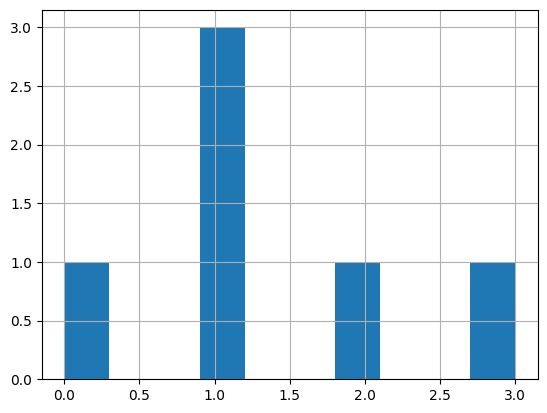

In [255]:
# You can also select just the rows and column you want to see.
# Here we first select just the rows with (titer = 32),
# then we take just the 'days_before_symptoms' column and turn it into a histogram.
covid_data[covid_data['titer'] == 32]['days_before_symptoms'].hist()

---

## Part 1: Data Iteration

By its nature, data is a collection of information.
So as an aspiring data scientist / machine learner, you will be spending a lot of time going through that collection of data.
Sometimes we will have nice functions to go through the data for us, like
[DataFrame.info()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html)
and [DataFrame.describe()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html).
But, many times we will need to go through (or "iterate") the data ourselves.

Since iteration is such a key part of working with data,
we will take a quick detour here to practice iteration through different types of data structures.

### Side Note on Math Ranges

In this class (and throughout your life), you will often see people write out ranges of numbers (also called "intervals") using square brackets and parenthesis.
Sometimes people will even use both in the same range!
This is not a mistake, the square brackets and parenthesis actually mean different things.
Square brackets means that this end of the range is **inclusive** (or "closed"), so the adjacent number is included in the range.
Whereas parenthesis means that this end of the range is **exclusive** (or "open"), so the adjacent number is not included in the range.

For example:
 - \[0, 3\] == {0, 1, 2, 3}
 - (0, 3) == {1, 2}
 - \[0, 3) == {0, 1, 2}
 - (0, 3\] == {1, 2, 3}

### Native Python Iteration

As with every (Turing-complete) programming language,
Python comes with the ability to iterate/loop over data.
This section will focus specifically on looping over different data structures,
for a general tutorial on loops in Python, see [this guide](https://www.learnpython.org/en/Loops).

The most common type of loop in Python is the **for** loop.
Python's for loop is technically a [foreach loop](https://en.wikipedia.org/wiki/Foreach_loop).
This means that the loops takes as an argument some [iterator](https://en.wikipedia.org/wiki/Iterator),
and keeps looping until the iterator is exhausted/empty.
(An iterator is just some objects that provides access to a sequence of other objects,
like how a list can provide access to its contents.)

The main two flavors of for loops you will see in Python are ones that go over a list of numbers using `range()`,
sometimes called "for-range" loops,
and those that go through a collection of items like a list or dict, called "foreach loops".

Let's start by looking at `range()` below.

In [256]:
# Iterations using range().

print("Iterate through a range of numbers: [0, 10).")
for i in range(10):
    # Note that we are using `end = ', '` so that our numbers get printed on one line.
    print(i, end = ', ')
print("\n---")

print("Iterate through a range of numbers: [10, 20).")
for i in range(10, 20):
    print(i, end = ', ')
print("\n---")

print("Iterate through a range of numbers, but increment by 2 every time: [10, 20).")
for i in range(10, 20, 2):
    print(i, end = ', ')
print("\n---")

# Note that a range() is not a list, but can be converted to one.
my_range = range(0, 5)
my_list = [0, 1, 2, 3, 4]

print("My Range: ", my_range)
print("My List:  ", my_list)

print("Are my range and list equal?: ", my_range == my_list)
print("Are my range and list equal after casting?: ", list(my_range) == my_list)

print("My Range (casted): ", list(my_range))

print("---")

# We can use range() together with len() to iterate through a list.
my_list = ['a', 'b', 'c']

for i in range(len(my_list)):
    print("Index: %d, Element: '%s'." % (i, my_list[i]))

Iterate through a range of numbers: [0, 10).
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 
---
Iterate through a range of numbers: [10, 20).
10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 
---
Iterate through a range of numbers, but increment by 2 every time: [10, 20).
10, 12, 14, 16, 18, 
---
My Range:  range(0, 5)
My List:   [0, 1, 2, 3, 4]
Are my range and list equal?:  False
Are my range and list equal after casting?:  True
My Range (casted):  [0, 1, 2, 3, 4]
---
Index: 0, Element: 'a'.
Index: 1, Element: 'b'.
Index: 2, Element: 'c'.


In addition to using range, we can use a list directly in a loop to iterate over its contents.

In [257]:
# Iterate over a normal list of strings.
print("Iterate through a standard list of strings.")
my_list = ['a', 'b', 'c']
for item in my_list:
    print(item, end = ', ')
print("\n---")

# The contents of the list do not matter.
print("Iterate through a list with a bunch of different types.")
my_list = ['a', 1, 2.3, None, {}, ['b']]
for item in my_list:
    print(item, end = ', ')
print("\n---")

# Empty lists will not cause any issues (nothing will get printed).
print("Iterate through an empty list.")
my_list = []
for item in my_list:
    print(item, end = ', ')
print("\n---")

# We can make the list right in the loop.
print("Iterate through a list we defined right at the loop.")
for item in [7, 8, 9]:
    print(item, end = ', ')
print("\n---")

Iterate through a standard list of strings.
a, b, c, 
---
Iterate through a list with a bunch of different types.
a, 1, 2.3, None, {}, ['b'], 
---
Iterate through an empty list.

---
Iterate through a list we defined right at the loop.
7, 8, 9, 
---


Lists are easy, but what if we want to iterate over dicts instead of lists?

We can use the same for loop to iterate over a dict,
**BUT** we will get the keys of the dict (not the values).
Be very careful about this!
It is a big source of bugs for junior Python developers.

To choose exactly what you get when iterating over a dict,
you can use the following methods:
 - `dict.keys()` -- Get the keys for a dict.
 - `dict.values()` -- Get the values for a dict.
 - `dict.items()` -- Get key/value pairs as tuples. This is the recommended way.

In [258]:
my_dict = {'a': 1, 'b': 2, 'c': 3}

# Be careful when doing this!
print("Iterate over the keys implicitly, by not using any specific method.")
for key in my_dict:
    print(key, end = ', ')
print("\n---")

print("Iterate over the keys explicitly, using the keys() method.")
for key in my_dict.keys():
    print(key, end = ', ')
print("\n---")

print("Iterate over the values explicitly, using the values() method.")
for value in my_dict.values():
    print(value, end = ', ')
print("\n---")

print("Iterate over the key/value pairs explicitly, using the items() method.")
for pair in my_dict.items():
    print(pair, end = ', ')
print("\n---")

# Here we can use something called "unpacking"
# to put the key and value into their own variables.
# The parenthesis are not required, but can make unpacking more clear.
print("Iterate over the key/value pairs explicitly, but unpack the pair.")
for (key, value) in my_dict.items():
    print("{Key: '%s', Value: %d}" % (key, value), end = ', ')
print("\n---")

Iterate over the keys implicitly, by not using any specific method.
a, b, c, 
---
Iterate over the keys explicitly, using the keys() method.
a, b, c, 
---
Iterate over the values explicitly, using the values() method.
1, 2, 3, 
---
Iterate over the key/value pairs explicitly, using the items() method.
('a', 1), ('b', 2), ('c', 3), 
---
Iterate over the key/value pairs explicitly, but unpack the pair.
{Key: 'a', Value: 1}, {Key: 'b', Value: 2}, {Key: 'c', Value: 3}, 
---


In addition to for loops,
Python also has while loops.
While loops will continue looping while its condition (called a "guard") is true.
While loops can be useful in more general cases.

In [259]:
# Loop until the count gets to 10.
count = 0
while (count < 10):
    print(count, end = ', ')
    count += 1
print("\n---")

# Loop forever! (or until we explicitly break).
count = 0
while (True):
    print(count, end = ', ')
    count += 1

    # There is a 1/10 chance of breaking the loop.
    if (random.randrange(0, 10) == 0):
        break
print("\n---")

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 
---
0, 
---


<h4 style="color: darkorange; font-size: x-large";>★ Task 1.A</h4>

Your task is to complete the function below: `collection_to_dict()`.
This function takes in collection that is **either** a `list` or a `dict`;
and returns a dict where
the keys are the value in the collection.
and the values are the index that corresponds to each value into the collection.
So for a dict you are "inverting" it (swapping the keys and values),
and for a list the values should be the integer indexes.

In [281]:
def collection_to_inverted_dict(collection):
    result = {}
    
    if isinstance(collection, list):
        # Invert a list
        for index in range(len(collection)):
            value = collection[index]
            result[value] = index
        return result
        
    elif isinstance(collection, dict):
        # Invert a dictionary
        for key in collection:
            value = collection[key]
            result[value] = key
        return result
    
    # If collection is neither a list nor a dict, return an empty dictionary
    return result
    
# Try with a simple list.
my_list = ['a', 'b', 'c']
expected = {
    'a': 0,
    'b': 1,
    'c': 2,
}
actual = collection_to_inverted_dict(my_list)
print("Does the expected result match your result (for a simple list)?: ", (expected == actual))

# Try with a simple dict.
my_dict = {0: 'a', 1: 'b', 2: 'c'}
expected = {
    'a': 0,
    'b': 1,
    'c': 2,
}
actual = collection_to_inverted_dict(my_dict)
print("Does the expected result match your result (for a simple dict)?: ", (expected == actual))

Does the expected result match your result (for a simple list)?:  True
Does the expected result match your result (for a simple dict)?:  True


### NumPy ndarrays

[NumPy](https://numpy.org/) is a scientific computing package for Python that is ubiquitous in the data science / machine learning community.
The most commonly used feature of NumPy is its [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)
(N-dimensional array).
Which is an array that can exist in more than one dimension.
In 1-dimension an ndarray is like a list,
in 2-dimensions an ndarray is like a grid,
in 3-dimensions an ndarray is like a cube,
and in 4-dimensions and up an ndarray is like a hypercube.
You can use the `shape` attribute to see the dimensions of an ndarray.

We will use ndarrays later in this course, but for this assignment we just need to know how to iterate over the values in an ndarray.
There are [several ways to iterate over ndarrays](https://numpy.org/doc/stable/reference/arrays.nditer.html),
but thankfully we can also iterate over them just like we do with normal Python lists.

In [282]:
# Make a 1-d array (just like a list).
my_array = numpy.array([1, 2, 3, 4, 5, 6])

print('1-d array: ', my_array)
print('Shape of array: ', my_array.shape)

# Note that len() only gives the length of the first dimension of the array.
# For a 1-d array, this is all the items.
print('Length of array: ', len(my_array))

# We can iterate using both a foreach and for-range.

# for-range
print("Iterate over 1-d array with for-range.")
for i in range(len(my_array)):
    print(my_array[i], end = ', ')
print('')

# foreach
print("Iterate over 1-d array with foreach.")
for value in my_array:
    print(value, end = ', ')
print('')

print("\n---\n")

# Now make a 2-d array (like a grid).
my_array = numpy.array([[1, 2, 3], [4, 5, 6]])

print('2-d array: ')
print(my_array)
print('Shape of array: ', my_array.shape)

# Note that len() only gives the length of the first dimension of the array.
# For a 2-d array, this is the number of rows.
print('Length of array: ', len(my_array))

# Note that when we iterate over a 2-d ndarray,
# each element returned will be row (1-d  ndarray).
print("Iterate over 2-d array with foreach.")
for row in my_array:
    for value in row:
        print(value, end = ', ')
print('')

1-d array:  [1 2 3 4 5 6]
Shape of array:  (6,)
Length of array:  6
Iterate over 1-d array with for-range.
1, 2, 3, 4, 5, 6, 
Iterate over 1-d array with foreach.
1, 2, 3, 4, 5, 6, 

---

2-d array: 
[[1 2 3]
 [4 5 6]]
Shape of array:  (2, 3)
Length of array:  2
Iterate over 2-d array with foreach.
1, 2, 3, 4, 5, 6, 


<h4 style="color: darkorange; font-size: x-large";>★ Task 1.B</h4>

Your task is to complete the function below: `ndarray_to_dict()`.
This function takes in a single 2-dimensional ndarray;
and returns a dict where the keys are a pair of indexes (row, column),
and the values are the value in the array at that location.

In [283]:
def ndarray_to_dict(array):
    result = {}
    for row_index in range(array.shape[0]):
        for col_index in range(array.shape[1]):
            result[(row_index, col_index)] = array[row_index, col_index]
    return result

# Try with a simple array.
my_array = numpy.array([['a', 'b'], ['c', 'd']])
expected = {
    (0, 0): 'a',
    (0, 1): 'b',
    (1, 0): 'c',
    (1, 1): 'd'
}
actual = ndarray_to_dict(my_array)
print("Does the expected result match your result?: ", (expected == actual))

# Try with a slightly bigger array.
my_array = numpy.array([['a', 'b', 'c'], ['d', 'e', 'f']])
ndarray_to_dict(my_array)

Does the expected result match your result?:  True


{(0, 0): np.str_('a'),
 (0, 1): np.str_('b'),
 (0, 2): np.str_('c'),
 (1, 0): np.str_('d'),
 (1, 1): np.str_('e'),
 (1, 2): np.str_('f')}

### Pandas

We will mainly be using Pandas DataFrames to hold our data throughout this course.
You have already seen some ways of iterating through a frame using 
[DataFrame.index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.index.html)
and [DataFrame.iterrows](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iterrows.html).
In this section, we will show a few more ways you can iterate over frames.

In [284]:
# Make our surfing frame again.
data = {
    'Name': ['Andrew', 'Eriq', 'Reilly', 'Michael'],
    'Surfing Score': [5.3, 5.9, 5.1, 5.2],
    'Qualification': ['MS', 'PhD', 'PhD', 'PhD'],
}
frame = pandas.DataFrame(data)

print("Base Frame:")
print(frame)
print('')

# When we use len() on a frame, we get the number of rows.
print("Length of frame: ", len(frame))

# When we use a foreach on a frame, then we get the column names.
print("\nIterate over the frame with a foreach:")
for value in frame:
    print(value, end = ', ')
print('')

# We can also use frame.columns to get the column names.
# You should prefer this version, since it is more clear what you are doing.
print("\nIterate over column names with `frame.columns`:")
for column_name in frame.columns:
    print(column_name, end = ', ')
print('')

# When you index a frame with a column name, then you get that column.
column = frame['Name']

print("\n'Name' Column: ")
print(column)
print('')

print("Length of column: ", len(column))

# We can iterate over a column using all of our standard list iteration techniques.

# for-range
print("Iterate over column with for-range.")
for i in range(len(column)):
    print(column[i], end = ', ')
print('')

# foreach
print("Iterate over column with foreach.")
for value in column:
    print(value, end = ', ')
print('')

Base Frame:
      Name  Surfing Score Qualification
0   Andrew            5.3            MS
1     Eriq            5.9           PhD
2   Reilly            5.1           PhD
3  Michael            5.2           PhD

Length of frame:  4

Iterate over the frame with a foreach:
Name, Surfing Score, Qualification, 

Iterate over column names with `frame.columns`:
Name, Surfing Score, Qualification, 

'Name' Column: 
0     Andrew
1       Eriq
2     Reilly
3    Michael
Name: Name, dtype: object

Length of column:  4
Iterate over column with for-range.
Andrew, Eriq, Reilly, Michael, 
Iterate over column with foreach.
Andrew, Eriq, Reilly, Michael, 


<h4 style="color: darkorange; font-size: x-large";>★ Task 1.C</h4>

Your task is to complete the function below: `frame_to_dict()`.
This function takes in a single Pandas DataFrame;
and returns a dict where the keys are a pair of indexes (column name, row index),
and the values are the value in the frame at that location.

In [285]:
def frame_to_dict(frame):
    result = {}
    for row in range(len(frame)):
        for column in frame.columns:
            result[column, row] = frame.at[row, column]
               
    return result

# Try with a simple frame.
data = {
    'A': [1, 2],
    'B': [3, 4],
}
frame = pandas.DataFrame(data)

expected = {
    ('A', 0): 1,
    ('A', 1): 2,
    ('B', 0): 3,
    ('B', 1): 4,
}
actual = frame_to_dict(frame)
print("Does the expected result match your result?: ", (expected == actual))

# Try with a slightly bigger frame.
data = {
    'Name': ['Andrew', 'Eriq', 'Reilly', 'Michael'],
    'Surfing Score': [5.3, 5.9, 5.1, 5.2],
    'Qualification': ['MS', 'PhD', 'PhD', 'PhD'],
}
frame = pandas.DataFrame(data)
frame_to_dict(frame)

Does the expected result match your result?:  True


{('Name', 0): 'Andrew',
 ('Surfing Score', 0): np.float64(5.3),
 ('Qualification', 0): 'MS',
 ('Name', 1): 'Eriq',
 ('Surfing Score', 1): np.float64(5.9),
 ('Qualification', 1): 'PhD',
 ('Name', 2): 'Reilly',
 ('Surfing Score', 2): np.float64(5.1),
 ('Qualification', 2): 'PhD',
 ('Name', 3): 'Michael',
 ('Surfing Score', 3): np.float64(5.2),
 ('Qualification', 3): 'PhD'}

---

## Part 2: Data Exploration

Now that we have covered some of the basics of Panda's DataFrames,
we will use those techniques to explore our data.

For all of the following questions, you can assume that the DataFrame your function will be receiving is structured the same (will have the same columns)
as the Covid-19 DataFrame we have been using up to this point (the one created in the first Python cell in this notebook).

<h3 style="color: darkorange; font-size: x-large";>★ Task 2.A</h3>

Complete the function below that counts the number of **infected** individuals.

In [286]:
def count_infected(frame):
    inf_ind = len(frame[frame['infected']])
    return inf_ind

print("Number of infected individuals: ", count_infected(covid_data))

Number of infected individuals:  255


<h3 style="color: darkorange; font-size: x-large";>★ Task 2.B</h3>

Complete the function below that counts the number of **symptomatic** individuals.

In [287]:
def count_symptomatic(frame):
    sym_ind = len(frame[frame['symptomatic']])
    return sym_ind

print("Number of symptomatic individuals: ", count_symptomatic(covid_data))

Number of symptomatic individuals:  138


<h3 style="color: darkorange; font-size: x-large";>★ Task 2.C</h3>

Complete the function below that computes the mean **days_before_symptoms** for individuals that have had symptoms (you may ignore rows with no value for this column).

In [288]:
def mean_days(frame):
    DBS_mean = frame['days_before_symptoms'].mean()
    
    return DBS_mean

print("Mean number of days before symptoms: ", mean_days(covid_data))

Mean number of days before symptoms:  5.405797101449275



---

## Part 3: Data Selection

In this part, we will now ask more complex questions that require selecting specific collections of rows.
For all exercises, do not round your answers.

<h3 style="color: darkorange; font-size: x-large";>★ Task 3.A</h3>

Complete the function below that computes the fraction of individuals that are infected.

In [289]:
def fraction_infected(frame):
    
    frac_tot = len(frame[frame['infected']]) / len(frame)
    return frac_tot

print("Fraction of infected individuals: ", fraction_infected(covid_data))

Fraction of infected individuals:  0.051


<h3 style="color: darkorange; font-size: x-large";>★ Task 3.B</h3>

Complete the function below that computes the fraction of infected individuals that are also symptomatic.

In [290]:
def fraction_symptomatic(frame):
    numerator = len(frame[frame['infected'] & frame['symptomatic']])
    comb_frac_tot = numerator / len(frame[frame['infected']])
    return comb_frac_tot

print("Fraction of infected and symptomatic individuals: ", fraction_symptomatic(covid_data))

Fraction of infected and symptomatic individuals:  0.5411764705882353


<h3 style="color: darkorange; font-size: x-large";>★ Task 3.C</h3>

Complete the function below that computes the number of uninfected individuals that have titers between 3 and 13 (exclusive).

In [291]:
def count_special_uninfected(frame):
    exclusive = frame[(~frame['infected']) & (frame['titer'] > 3) & (frame['titer'] < 13)]
    
    return exclusive.shape[0]
    
print("Number of uninfected with titers in (3, 13): ", count_special_uninfected(covid_data))

Number of uninfected with titers in (3, 13):  2


<h3 style="color: darkorange; font-size: x-large";>★ Task 3.D</h3>

Complete the function below that computes the fraction of uninfected individuals that are isoantigenic (**not infected** and have a titer value >= 1).

In [303]:
def fraction_isoantigenic(frame):
    # Count uninfected individuals
    uninfected_count = frame[~frame['infected']].shape[0]
    
    # Count uninfected and isoantigenic individuals
    isoantigenic_count = frame[
        (~frame['infected']) & (frame['titer'] >= 1)
    ].shape[0]
    
    # Avoid division by zero
    if uninfected_count == 0:
        return 0
    
    # Calculate the fraction
    fraction = isoantigenic_count / uninfected_count
    return fraction

print("Fraction of uninfected and isoantigenic individuals: ", fraction_isoantigenic(covid_data))

Fraction of uninfected and isoantigenic individuals:  0.30748155953635403


---

## Part 4: Feature Engineering

[Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering) is a **HUGE** part of machine learning that involves picking out (or transforming) the data that will be most useful to your algorithms.
In future assignments, we will cover feature engineering in much greater detail.
For now, let's just create a single simple feature.

<h3 style="color: darkorange; font-size: x-large";>★ Task 4.A</h3>

Complete the function below that adds a new column to the given frame, and returns the modified frame.
This column should be labeled "isoantigenic",
and should contain boolean values describing individuals whom are isoantigenic (**not infected** and have a titer value >= 1).

Hint: Although Pandas can do this in one line, it is much easier to first iterate over each row to compute a value and then add these values as a new column.

In [293]:
def add_isoantigenic_column(frame):
    frame['isoantigenic'] = (~frame['infected']) & (frame['titer'] >= 1)
    return frame

new_covid_data = add_isoantigenic_column(covid_data.copy())
print("Frame with added column:")
new_covid_data

Frame with added column:


,infected,symptomatic,days_before_symptoms,titer,isoantigenic
id,,,,,
0,False,False,NaN,0,False
1,False,False,NaN,0,False
2,False,False,NaN,26,True
3,False,False,NaN,0,False
4,False,False,NaN,0,False
...,...,...,...,...,...
4995,False,False,NaN,0,False
4996,False,False,NaN,1,True
4997,False,False,NaN,0,False


---

## Part 5: Plotting

In this section, we will work with some basic visualization capabilities built into Pandas.
For a more complete reference, see [this reference](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html).
Keep in mind that in most applied settings, you'll probably see more customizable methods using [matplotlib](https://matplotlib.org/) or [seaborn](https://seaborn.pydata.org/).

[Histograms](https://en.wikipedia.org/wiki/Histogram) are a good visualization to start with, since they can help give you a rough idea about specific columns in your data.
Creating a histogram from a frame is very simple:
just select the column you want to examine and call [DataFrame.hist()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html):

<Axes: >

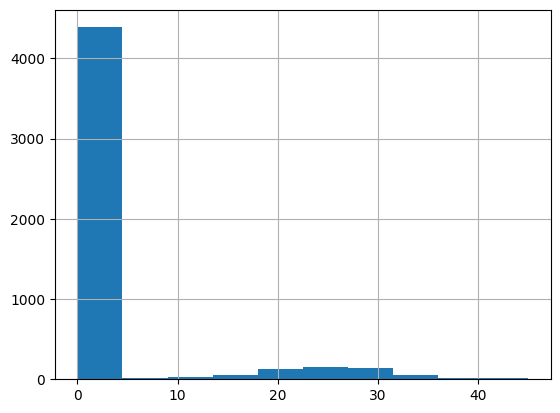

In [294]:
covid_data['titer'].hist()

You can also have more fine-grained control over how the data is grouped together and counted (just consult [the documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html) for the options you can configure):

<Axes: >

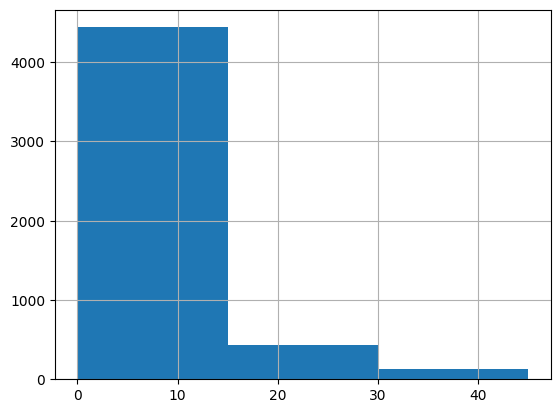

In [295]:
covid_data['titer'].hist(bins = 3)

After histograms, [scatter plots](https://en.wikipedia.org/wiki/Scatter_plot) are the next go-to visualization for data.
Histograms are good for giving us an idea about a single dimension/column of the data,
and scatter plots are good for giving us an idea about how two dimensions/columns of the data interact.

For example, we can look at how the `days_before_symptoms` and `titer` columns of our dataset interact with one another:

<Axes: xlabel='days_before_symptoms', ylabel='titer'>

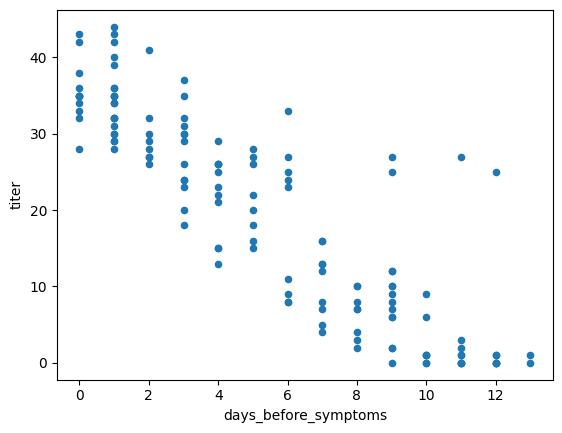

In [296]:
covid_data.plot.scatter(x = 'days_before_symptoms', y = 'titer')

<h3 style="color: darkorange; font-size: x-large";>★ Task 5.A</h3>

Complete the function below that takes in a frame and prepares it to be rendered as a scatter plot.
The function takes in a frame, two column names, and two labels for the x and y axis of the scatter plot.
The function should return a frame that can then be turned into the scatter plot we want by calling `DataFrame.plot.scatter(x = 0, y = 1)` on it.
(If you are not sure what those options are, then make sure to consult [the documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html).

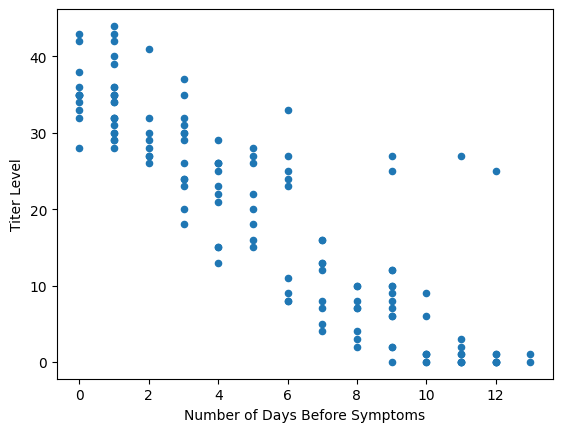

In [297]:
def prep_scatter(frame, x_column, y_column, x_label, y_label):
    # Select the specified columns and create a new DataFrame
    new_frame = frame[[x_column, y_column]].copy()
    # Rename the columns with the provided labels
    new_frame.columns = [x_label, y_label]
    return new_frame


# Prep the data to be displayed as a scatter plot.
scatter_frame = prep_scatter(covid_data,
                             'days_before_symptoms', 'titer',
                             'Number of Days Before Symptoms', 'Titer Level')

# Display the scatter plot.
if ((scatter_frame is not None) and (scatter_frame is not NotImplemented)):
    scatter_frame.plot.scatter(x = 0, y = 1)
else:
    print("prep_scatter() not implemented yet.")

---

## Part 6: Making Sense of Equations

Throughout this course (and many of your CS (or math) courses going forward),
you will be presented with mathematical equations that you will need to understand.
You may have to just read these equations, apply these equations on pen and paper,
or translate these equations into code.
If you are not used to working with equations, that last task may be a bit intimidating.
In this part, we will walk through an example of breaking down an equation which you will then translate into code.

To start, let's first imagine that we have some way of predicting whether someone has Covid-19 based on the data we have been working with in this assignment.
In future assignments, we will dive into much more rigorous, accurate, and cool ways to do this,
but for now let's use the following naive function:

In [298]:
def predict_covid(titer):
    return titer > 20

This function is simple and will return true (indicating the function thinks the patient is infected) if the titer value is greater than 20.
Otherwise, the prediction function will return false (indicating the function thinks the patient is not infected).

Now that we have something that makes predictions (even though it is overly simple),
we can evaluate how good our predictions are.
To evaluate our function's performance, we can use [evaluation metrics](https://en.wikipedia.org/wiki/Evaluation_of_binary_classifiers#Single_metrics),
which are numbers that quantify predictive performance (how well our predictions match reality).
There are [dozens of evaluation metrics](https://scikit-learn.org/stable/modules/model_evaluation.html),
but for this example we will use [root mean square error (RMSE)](https://en.wikipedia.org/wiki/Root-mean-square_deviation) (also sometimes called root mean square deviation (RMSD)).

The equation for RMSE is:
$$
\sqrt{  \frac{  \sum\nolimits_{i = 1}^{N} ( \hat{y}_i - y_i )^2 }{ N } }
$$

This equation may look intimidating, but let's break the equation down piece-by-piece.

First, we see a big square root covering everything.
We already know how to use a square root, so let's put that aside for now and simplify the equation:
$$
\frac{  \sum\nolimits_{i = 1}^{N} ( \hat{y}_i - y_i )^2 }{ N }
$$

Now we see a fraction with a summation in the numerator and a single variable ($ N $) as the denominator.
Note that the summation goes from $ i = 1 $ to $ N $, so it is adding up $ N $ different values.
Since we are adding up $ N $ values and $ N $ is also the denominator,
this fraction looks like it is computing the mean of whatever the summation is adding up.
Since we also know how to compute a mean, let's put that part aside and focus on the summation:
$$
\sum\nolimits_{i = 1}^{N} ( \hat{y}_i - y_i )^2
$$

The summation is using $ i $ as its incrementing variable and is going from $ 1 $ to $ N $.
We can also see that the value inside the summation is squared.
We can easily deal with squaring values, so let's simplify again:
$$
\hat{y}_i - y_i
$$

Here, we are finally left with a simple expression, but we have to make sure we understand what these two values represent.
In machine learning equations (as you have already seen in class),
we represent labels/classes with the letter $ y $.
By itself $ y $ usually represents a true label,
and with a hat $ \hat{y} $ usually represents a predicted label.
Therefore, our expression ($ \hat{y}_i - y_i $) is taking the difference between the predicted label ($ \hat{y} $) and the true label ($ y $) for the ith data point.
We often call this (the difference between true and predicted values) the *error* of a prediction.

So to summarize what we discovered starting from the inner-most part of the equation and working out:
 - First, the equation computes the **error** for each prediction.
 - Then, the **square** of that error is computed.
 - The **mean** of all those squared errors is computed using the summation and division.
 - Then finally, the equation takes the square **root** of that mean.
When we phrase it like this,
you can see why this metric is called "root mean square error".

By breaking up this equation into smaller chunks,
we were able to understand each part individually and then put them all back together into the full equation.
And now that we understand the equation, we can implement it in code.

Here are some tips to use when translating equations into code:
 - Look for summations, these usually indicate loops.
 - Tend to start with the inside of the equation, since the outer parts of an equation are evaluated last.
 - Don't be afraid to break up your implementation using more code functions (just like how some equations call into other equations/functions).
 - Be careful about order of operations.
 - Even though equations will usually use short variable names, longer and more descriptive names can be more useful in code (e.g. using `predicted_label` is more readable than `y_hat`).

<h3 style="color: darkorange; font-size: x-large";>★ Task 6.A</h3>

Complete the function below that takes in two lists and computes the RMSE between them.
The lists will always have the same number of values in them and will never be empty.

*Note: If you want to use the math library (like for `math.sqrt()`), make sure to import it in the first code cell of this notebook (where pandas is also imported).*

In [299]:
def rmse(predicted_values, true_values):

    if len(predicted_values) != len(true_values):
        raise ValueError("The lengths of predicted_values and true_values must match.")
    
    # Initialize the sum of squared differences
    squared_difference_sum = 0.0
    
    # Compute squared differences and sum them
    for predicted, true in zip(predicted_values, true_values):
        squared_difference_sum += (predicted - true) ** 2
    
    # Compute the mean of squared differences
    mean_squared_error = squared_difference_sum / len(true_values)
    
    # Calculate and return the RMSE
    rsme_calc = math.sqrt(mean_squared_error)
    return rsme_calc

# Test our new function on simple data.
predictions = [1, 1, 0, 0]
labels = [1, 0, 1, 0]

rmse(predictions, labels)

0.7071067811865476

We can also use our new function on our Covid-19 data, but it will require a little work to prepare the data:

In [300]:
# Make predictions for each row in our Covid-19 data.
predictions = [predict_covid(value) for value in covid_data['titer']]

# Get the actual labels (infected status) for our data and convert it into a list.
labels = list(covid_data['infected'])

# Right now, all our predicted and true values are booleans.
# Convert them into ints so we can do math on them (False = 0, True = 1).
predictions = list(map(int, predictions))
labels = list(map(int, labels))

rmse(predictions, labels)

0.2949576240750525

In [301]:
covid_data

,infected,symptomatic,days_before_symptoms,titer
id,,,,
0,False,False,NaN,0
1,False,False,NaN,0
2,False,False,NaN,26
3,False,False,NaN,0
4,False,False,NaN,0
...,...,...,...,...
4995,False,False,NaN,0
4996,False,False,NaN,1
4997,False,False,NaN,0
